# Dog Autoencoder

Bazat pe https://www.kaggle.com/code/cdeotte/dog-autoencoder#How-is-LB-scored

# Dataset

Din https://images.cv/dataset/dog-image-classification-dataset

In [12]:
ComputeLB = False

import os, gc, zipfile
import numpy as np, pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# if ComputeLB: PATH = '../input/generative-dog-images/all-dogs/all-dogs/'
# else: PATH = '../input/all-dogs/all-dogs/'

# Path to the zipped file
zip_file_path_1 = '/kaggle/input/generative-dog-images/all-dogs.zip'
zip_file_path_2 = '/kaggle/input/generative-dog-images/Annotation.zip'

# Destination directory where you want to unzip the files
destination_directory_1 = '/kaggle/working/all-dogs/'
destination_directory_2 = '/kaggle/working/Annotations/'

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory_1, exist_ok=True)
os.makedirs(destination_directory_2, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path_1, 'r') as zip_ref:
    zip_ref.extractall(destination_directory_1)
    
with zipfile.ZipFile(zip_file_path_2, 'r') as zip_ref:
    zip_ref.extractall(destination_directory_2)

IMAGES = os.listdir(PATH)

num_img = len(IMAGES)

print('There are',num_img,'images. Here are 5 example filesnames:')
print(IMAGES[:5])



There are 2 images. Here are 5 example filesnames:
['Annotation.zip', 'all-dogs.zip']


In [22]:
PATH = os.path.join('/kaggle/working/', 'all-dogs', 'all-dogs')

IMAGES = os.listdir(PATH)

num_img = len(IMAGES)
num_img

20579

In [23]:
# if not os.path.isdir('../tmp'):
#     os.mkdir('../tmp')
# if not os.path.isdir('../tmp/images'):
#     os.mkdir('../tmp/images')

# # CREATE RANDOMLY CROPPED IMAGES
for i in range(num_img):
    img = Image.open(os.path.join(PATH, IMAGES[i%num_img]))
    img = img.resize(( 100,int(img.size[1]/(img.size[0]/100) )), Image.ANTIALIAS)
    w = img.size[0]; h = img.size[1]; a=0; b=0
    if w>64: a = np.random.randint(0,w-64)
    if h>64: b = np.random.randint(0,h-64)
    img = img.crop((a, b, 64+a, 64+b))
    img.save('../tmp/images/'+str(i)+'.png','PNG')
    if i%num_img==0: print('created',i,'cropped images')
print(f'created {num_img} cropped images')

created 0 cropped images
created 20579 cropped images


# Build Autoencoder
This code is inspired by Keras' tutorial [here][1]

[1]: https://blog.keras.io/building-autoencoders-in-keras.html

In [24]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

BATCH_SIZE = 256; EPOCHS = 50
train_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory('../tmp/',
        target_size=(64,64), shuffle=True, class_mode='input', batch_size=BATCH_SIZE)

Using TensorFlow backend.


Found 20579 images belonging to 1 classes.


In [25]:
# ENCODER
input_img = Input(shape=(64, 64, 3))  
x = Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(32, (1, 1), activation='relu', padding='same')(x)

# LATENT SPACE
latentSize = (8,8,32)

# DECODER
direct_input = Input(shape=latentSize)
x = Conv2D(192, (1, 1), activation='relu', padding='same')(direct_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# COMPILE
encoder = Model(input_img, encoded)
decoder = Model(direct_input, decoded)
autoencoder = Model(input_img, decoder(encoded))

autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

# Train Autoencoder

Am mărit numărul de epoci la 50, sperând la rezultate mai clare. Loss ~= 0.56

In [26]:
history = autoencoder.fit_generator(train_batches,
        steps_per_epoch = train_batches.samples // BATCH_SIZE,
        epochs = EPOCHS, verbose=2)

Epoch 1/50
 - 17s - loss: 0.6052
Epoch 2/50
 - 11s - loss: 0.5651
Epoch 3/50
 - 11s - loss: 0.5591
Epoch 4/50
 - 11s - loss: 0.5564
Epoch 5/50
 - 11s - loss: 0.5547
Epoch 6/50
 - 11s - loss: 0.5532
Epoch 7/50
 - 11s - loss: 0.5517
Epoch 8/50
 - 11s - loss: 0.5511
Epoch 9/50
 - 11s - loss: 0.5502
Epoch 10/50
 - 11s - loss: 0.5495
Epoch 11/50
 - 11s - loss: 0.5491
Epoch 12/50
 - 11s - loss: 0.5486
Epoch 13/50
 - 11s - loss: 0.5486
Epoch 14/50
 - 11s - loss: 0.5472
Epoch 15/50
 - 11s - loss: 0.5475
Epoch 16/50
 - 11s - loss: 0.5477
Epoch 17/50
 - 11s - loss: 0.5463
Epoch 18/50
 - 11s - loss: 0.5469
Epoch 19/50
 - 11s - loss: 0.5466
Epoch 20/50
 - 11s - loss: 0.5465
Epoch 21/50
 - 11s - loss: 0.5460
Epoch 22/50
 - 11s - loss: 0.5461
Epoch 23/50
 - 11s - loss: 0.5460
Epoch 24/50
 - 11s - loss: 0.5454
Epoch 25/50
 - 11s - loss: 0.5463
Epoch 26/50
 - 11s - loss: 0.5450
Epoch 27/50
 - 11s - loss: 0.5459
Epoch 28/50
 - 11s - loss: 0.5456
Epoch 29/50
 - 11s - loss: 0.5448
Epoch 30/50
 - 11s - lo

# View Reconstruction
Our encoder works by mapping images from 12288 dimensional space (64 x 64 x 3) into 2048 dimensional space (latent image). This is a 6x compression rate. Our decoder works by mapping our latent image back into 12288 dimensional space. Below are examples. (Note that a decoder is like a GAN generator).

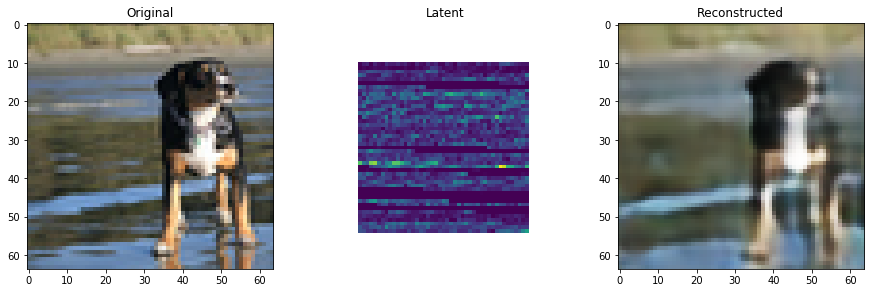

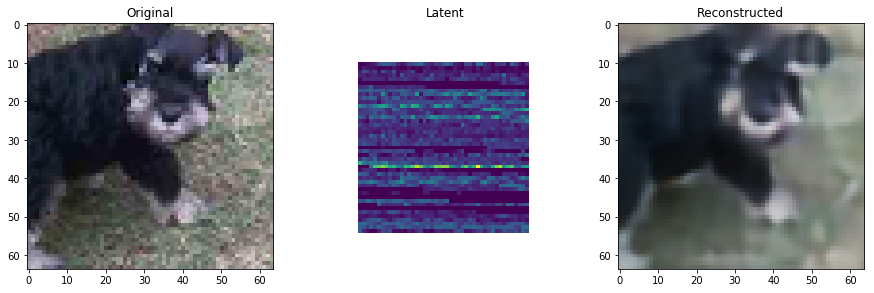

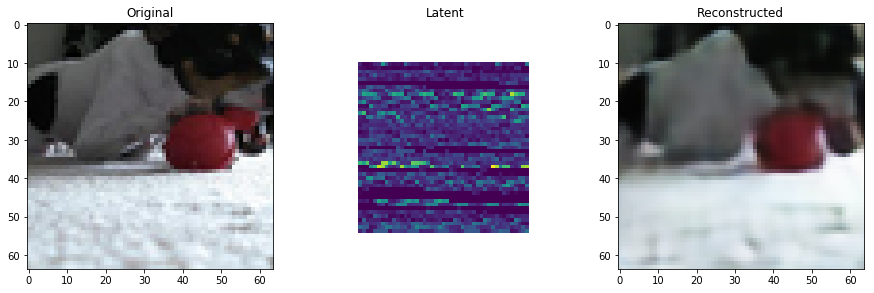

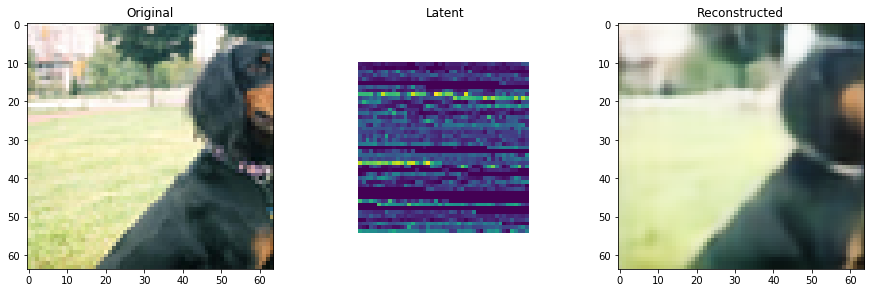

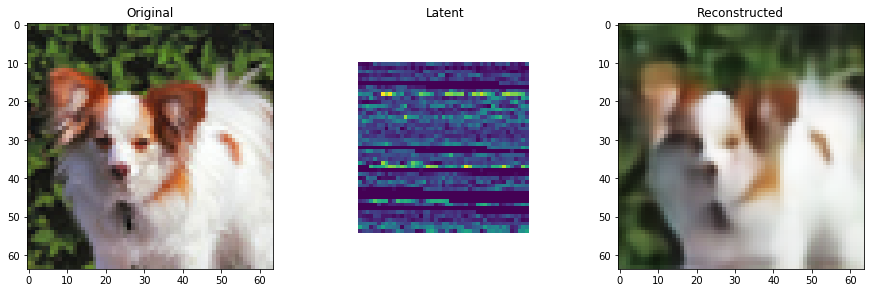

In [27]:
images = next(iter(train_batches))[0]
for i in range(5):

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    
    # ORIGINAL IMAGE
    orig = images[i,:,:,:].reshape((-1,64,64,3))
    img = Image.fromarray( (255*orig).astype('uint8').reshape((64,64,3)))
    plt.title('Original')
    plt.imshow(img)

    # LATENT IMAGE
    latent_img = encoder.predict(orig)
    mx = np.max( latent_img[0] )
    mn = np.min( latent_img[0] )
    latent_flat = ((latent_img[0] - mn) * 255/(mx - mn)).flatten(order='F')
    img = Image.fromarray( latent_flat[:2025].astype('uint8').reshape((45,45)), mode='L') 
    plt.subplot(1,3,2)
    plt.title('Latent')
    plt.xlim((-10,55))
    plt.ylim((-10,55))
    plt.axis('off')
    plt.imshow(img)

    # RECONSTRUCTED IMAGE
    decoded_imgs = decoder.predict(latent_img[0].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.subplot(1,3,3)
    plt.title('Reconstructed')
    plt.imshow(img)
    
    plt.show()

# Latent Space and dog Generation
We choose the size of latent space. In our autoencoder, we chose for latent space to be 2048 dimensional (6x compression). If we map all 20,000 images into latent space, they would cluster inside a 2048 dimensional hyperellipsoid. That ellipsoid would represent dog images. (Cat images would form a different ellipsoid). Below I have plotted 256 of our dog images in latent space as blue dots and drew their ellipsoid. (Note that latent space is being projected onto 2D for display in this kernel). (Note because of ReLU, you may see clipping).

If we would like to generate a new dog image, we can chose a new random point (different from existing training image dots) inside this ellipsoid and then decode it. For example, we could choose the 9 red points below and then convert them into dog images.

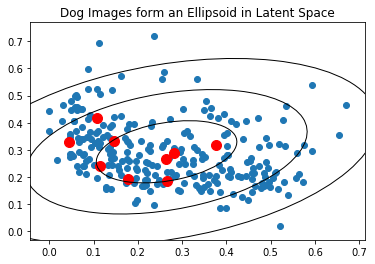

In [28]:
from matplotlib.patches import Ellipse

# PROJECT LATENT INTO 2D, AVOID DEAD RELU
latent_img = encoder.predict(images)
latent_img2 = latent_img.reshape((-1,latentSize[0]*latentSize[1]*latentSize[2]))
d = 0; s = 0
while s<0.1:
    x = latent_img2[:,d]
    s = np.std(x); d += 1
s = 0
while s<0.1:
    y = latent_img2[:,d]
    s = np.std(y); d += 1

# CALCULATE ELLIPSOID FROM 256 IMAGES
cov = np.cov(x, y)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
for j in [1,2,3]:
    ell = Ellipse(xy=(np.mean(x), np.mean(y)), width=lambda_[0]*j*2, 
            height=lambda_[1]*j*2, angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('None')
    ell.set_edgecolor('black')
    plt.gca().add_artist(ell)
    
# PLOT 256 IMAGES AS DOTS IN LATENT SPACE
plt.scatter(x,y)
d = np.random.multivariate_normal([np.mean(x),np.mean(y)],cov,9)
plt.scatter(d[:,0],d[:,1],color='red',s=100)
plt.title('Dog Images form an Ellipsoid in Latent Space')
plt.show()

In [32]:
# CREATE num_img CROPPED IMAGES
x = np.random.choice(np.arange(num_img),num_img)
images = np.zeros((num_img,64,64,3))

# print(x)

for i in range(len(x)):
    img = Image.open(os.path.join(PATH, IMAGES[x[i]]))
    img = img.resize((100,int(img.size[1]/(img.size[0]/100))), Image.ANTIALIAS)
    img = img.crop((18, 0, 82, 64))
    images[i,:,:,:] = np.asarray(img).astype('float32') / 255.
    #if i%1000==0: print(i)
        
# CALCULATE ELLIPSOID FROM num_img IMAGES        
encoded_imgs = encoder.predict(images)
sz = latentSize[0] * latentSize[1] * latentSize[2]
encoded_imgs = encoded_imgs.reshape((-1,sz))
mm = np.mean(encoded_imgs,axis=0)
ss = np.cov(encoded_imgs,rowvar=False)

# GENERATE 9 RANDOM dog IMAGES
generated = np.random.multivariate_normal(mm,ss,9)
generated = generated.reshape((-1,latentSize[0],latentSize[1],latentSize[2]))

In [39]:
print("Shape of generated array:", generated.shape)


Shape of generated array: (9, 8, 8, 32)


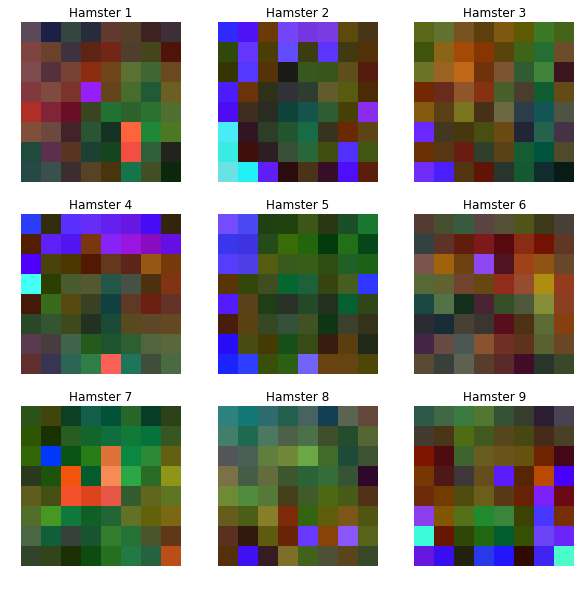

In [103]:
# Display the generated dog images
plt.figure(figsize=(10, 10))
for i in range(9):
    # Scale the values to the range [0, 255] and convert to uint8
    scaled_image = (generated[i, :, :, :3] * 255).astype('uint8')
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(scaled_image)
    plt.axis('off')
    plt.title(f'dog {i+1}')
plt.show()


In [110]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter

def apply_vignette(image, strength=0.5, blend_alpha=0.5, sharpen_strength=0.5):
    """
    Apply a vignette effect to the input image, blend it with the original image, and sharpen the output.

    Parameters:
        image (numpy.ndarray): Input image as a NumPy array.
        strength (float): Strength of the vignette effect. Values closer to 0 will darken the edges more.
        blend_alpha (float): Alpha value for blending. 0 means only the vignetted image is visible, 
                            1 means only the original image is visible, and values in between blend the two.
        sharpen_strength (float): Strength of the sharpening effect. Values closer to 0 will result in less sharpening.

    Returns:
        numpy.ndarray: Vignetted, blended, and sharpened image as a NumPy array.
    """
    return image
    # Create a meshgrid of x and y coordinates
    h, w = image.shape[:2]
    y, x = np.ogrid[:h, :w]
    
    # Calculate the distance from the center of the image
    center = (h / 2, w / 2)
    radius = min(h, w) / 2
    distance = np.sqrt((x - center[1]) ** 2 + (y - center[0]) ** 2)
    
    # Create a circular mask that fades from the center to the edges
    mask = 1 - np.clip(distance / (radius * strength), 0, 1)
    
    # Apply the mask to darken the edges
    vignetted_image = image * mask[..., np.newaxis]
    
    # Blend the vignetted image with the original image
    blended_image = blend_alpha + vignetted_image + (1 - blend_alpha) * image
    
    # Sharpen the blended image
    sharpened_image = blended_image + sharpen_strength * (blended_image - gaussian_filter(blended_image, sigma=10))
    
    return image
    return (sharpened_image / 2) + (image / 2)


In [117]:
def blend_images(image1, image2, alpha):
    """
    Blend between two images using alpha blending.

    Parameters:
        image1 (numpy.ndarray): First input image as a NumPy array.
        image2 (numpy.ndarray): Second input image as a NumPy array.
        alpha (float): Alpha value for blending. 
                       0 means only the first image is visible, 
                       1 means only the second image is visible, 
                       and values in between blend the two images.

    Returns:
        numpy.ndarray: Blended image as a NumPy array.
    """
    blended_image = alpha * image2 + (1 - alpha) * image1
    return blended_image


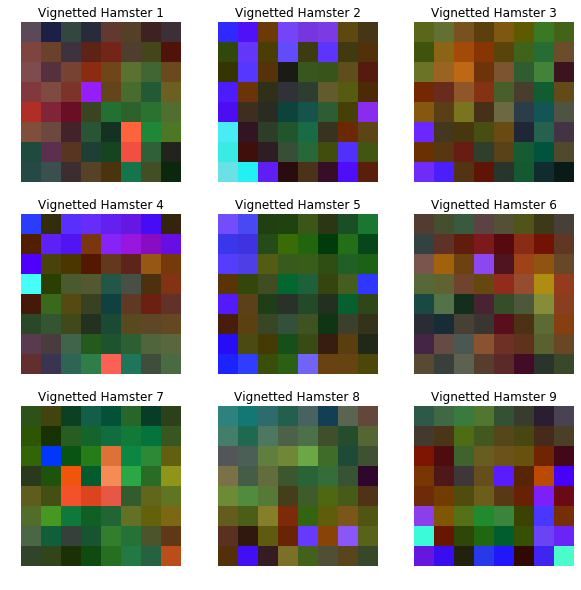

In [132]:
from skimage.transform import resize
import cv2
# Assuming 'generated' is your array of generated images
vignetted_images = [apply_vignette(img, 0.19, 0.150, 10.0) for img in generated]

# Resize the vignetted images to match the original image dimensions
original_size = (64, 64)  # Assuming the original image size is (64, 64)
vignetted_images_resized = [cv2.resize(img, original_size) for img in vignetted_images]

# Display the vignetted images
plt.figure(figsize=(10, 10))
for i in range(9):
    vignetted_image_rgb = vignetted_images_resized[i][:, :, :3]  # Select only the first 3 channels
    scaled_image = (vignetted_image_rgb * 255).astype('uint8')  # Scale pixel values to [0, 255]
    scaled_image_original = (generated[i, :, :, :3] * 255).astype('uint8')
        
    plt.subplot(3, 3, i + 1)
#     scaled_image_resized = cv2.resize(scaled_image, scaled_image_original.shape[:2], interpolation=cv2.INTER_LINEAR)

    plt.imshow(scaled_image_original)
    plt.axis('off')
    plt.title(f'Vignetted dog {i+1}')
plt.show()

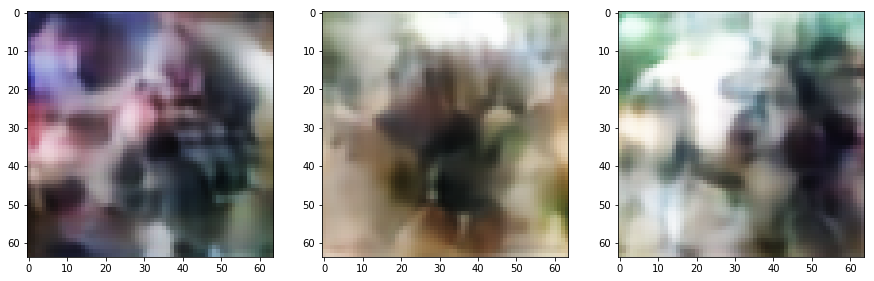

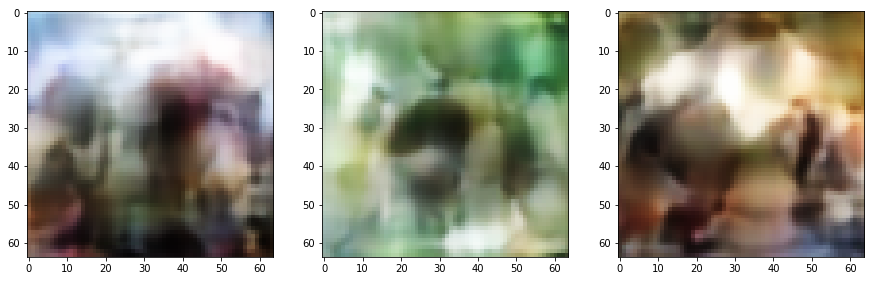

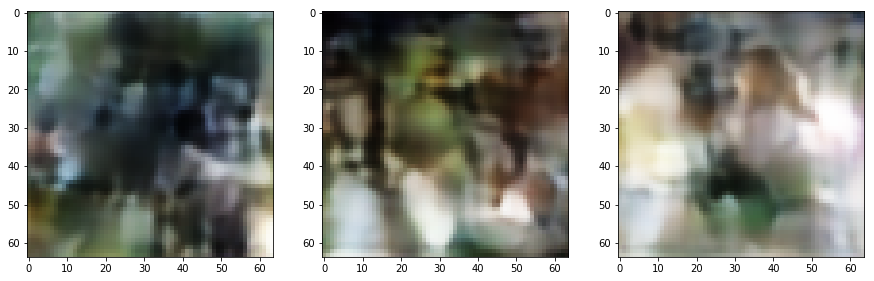

In [116]:
# PLOT 9 RANDOM dog IMAGES
for k in range(3):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    decoded_imgs = decoder.predict(generated[k*3].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)
    plt.subplot(1,3,2)
    decoded_imgs = decoder.predict(generated[k*3+1].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)
    plt.subplot(1,3,3)
    decoded_imgs = decoder.predict(generated[k*3+2].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)
    plt.show()

# How is LB scored?
What is the FID (Fréchet Inception Distance) metric? Now that we understand latent space, the FID metric is easy to understand. After we train our autoencoder, we can compute the latent hyper-ellipsoid of our dog training data. Then if someone generates dog images, we could feed them into our autoencoder and calculate the latent hyper-ellipsoid of their generated dog images. Then FID is basically the distance between the two latent hyper-ellipsoids squared.

Let `e1` be the training dog ellipsoid and `e2` be the generated dog ellipsoid. Let `x0, x1, ..., x2047` be the 2048 features of latent space. Each vector `x_k` from training dataset `e1` has approx 20000 values, and `e2` has 10000. Then the distance between the ellipsoids is approx the sum of the difference of means (ellipse centers) and sum of the difference of standard deviations (ellipse widths) of each 2048 `x_k`, i.e. `(mean(x_k)_e1 - mean(x_k)_e2)` plus `(std(x_k)_e1 - std(x_k)_e2)` for each of the 2048 `k` values. Finally `FID = this sum^2`.

# Generating Better Dog Images
The generated dog images above are not very recognizable. Instead of choosing completely random points in latent space, we can choose points near existing training images. Let's try that.

In [133]:
# DISTANCE TO MOVE AWAY FROM EXISTING TRAIN IMAGES
beta = 0.35
# GENERATE 9 RANDOM dog IMAGES
generated = np.random.multivariate_normal(mm,ss,9)
generated = beta*generated + (1-beta)*encoded_imgs[:9]

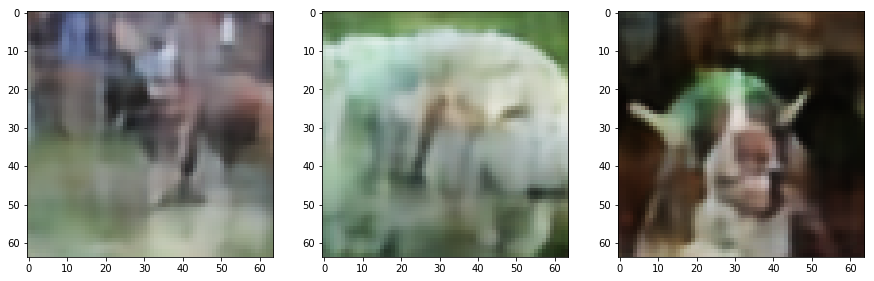

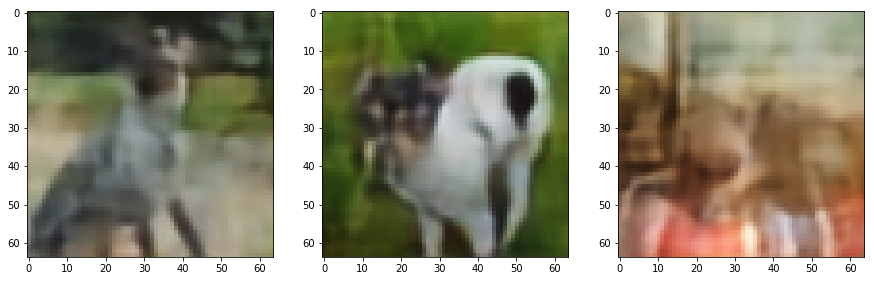

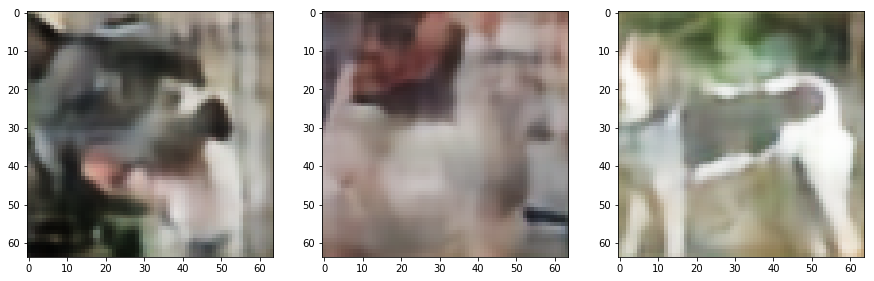

In [134]:
for k in range(3):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    decoded_imgs = decoder.predict(generated[k*3].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)
    plt.subplot(1,3,2)
    decoded_imgs = decoder.predict(generated[k*3+1].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)
    plt.subplot(1,3,3)
    decoded_imgs = decoder.predict(generated[k*3+2].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)
    plt.show()

In [149]:
beta = 0.2
# GENERATE num_img RANDOM DOG IMAGES FOR KAGGLE
generated = np.random.multivariate_normal(mm,ss,num_img)
encoded_imgs = beta*generated + (1-beta)*encoded_imgs
decoded_imgs = decoder.predict(encoded_imgs.reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
decoded_imgs.shape

(20579, 64, 64, 3)

In [147]:
# generated = np.random.multivariate_normal(mm,ss,3)
# generated = generated.reshape((-1,latentSize[0],latentSize[1],latentSize[2]))

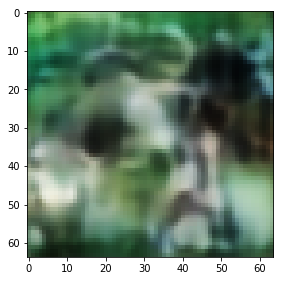

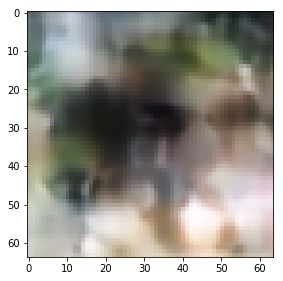

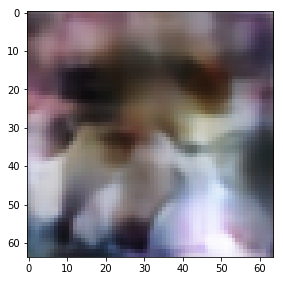

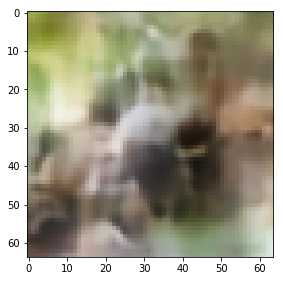

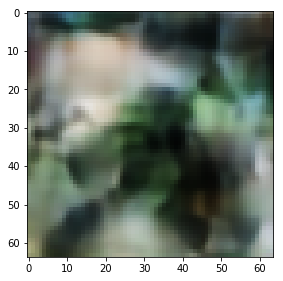

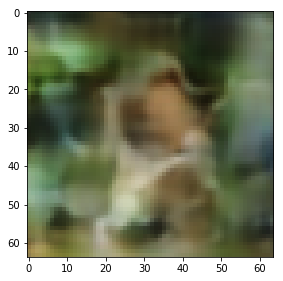

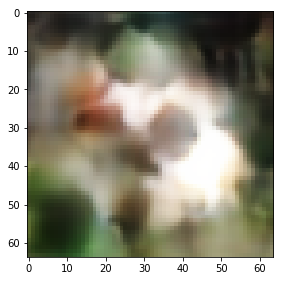

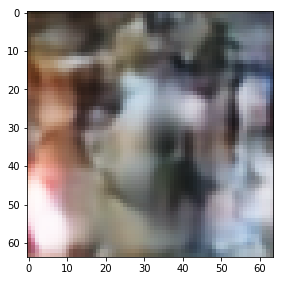

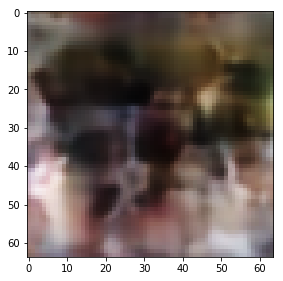

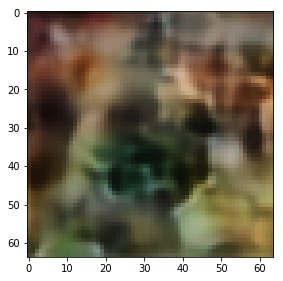

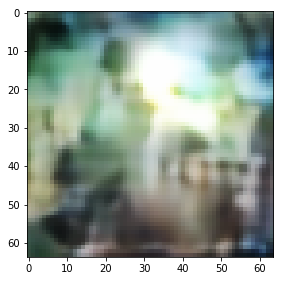

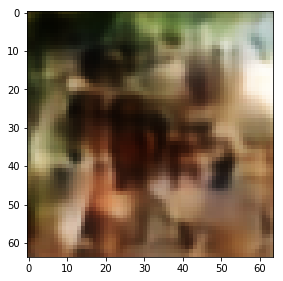

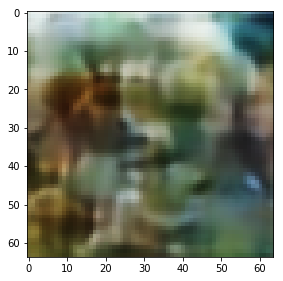

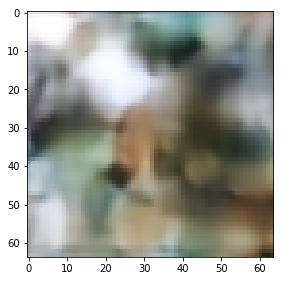

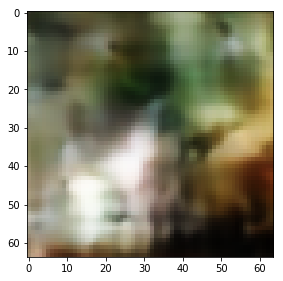

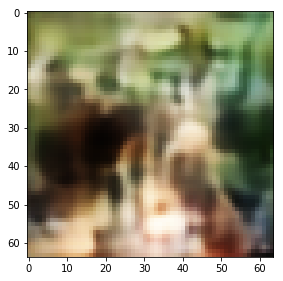

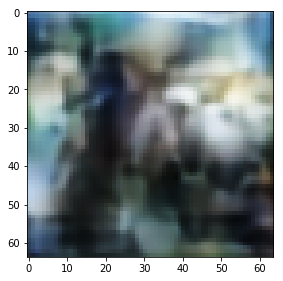

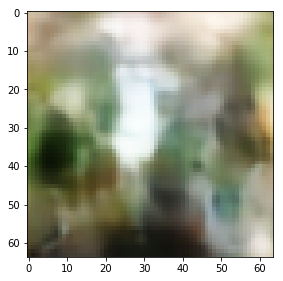

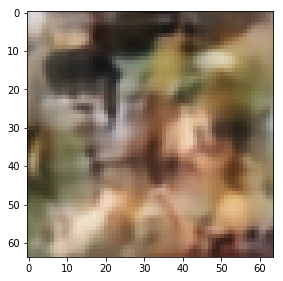

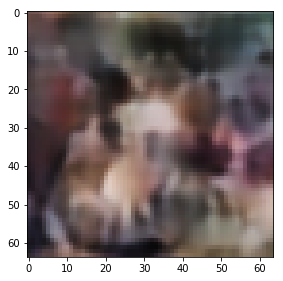

In [152]:
for k in range(20):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    decoded_imgs = decoder.predict(generated[k].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)